# # Time dependence - Gaussian pulse

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

Var.value = 20.0, .min = 10.0, .max = 30.0, .fit: True, .id: t0
Var.value = 5.0, .min = 1.0, .max = 10.0, .fit: True, .id: fwhm


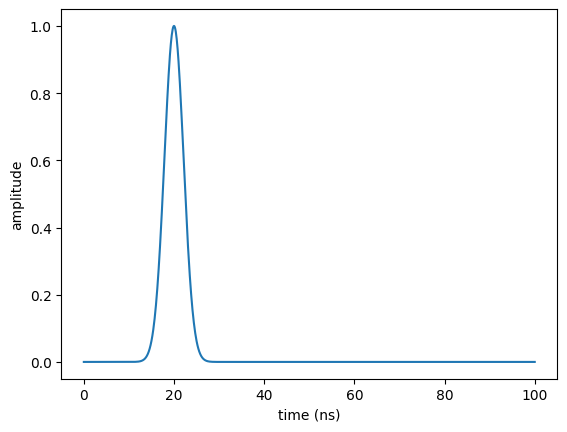

In [2]:
# create a Gaussian pulse
class GaussianPulse(nx.FunctionTime):
    def __init__(self, t0, fwhm):
        super().__init__("Gaussian pulse")
        # create a self. instance of each variable
        self.t0 = t0
        self.fwhm = fwhm
        # register them in the self.fit_variables 
        self.fit_variables = [t0, fwhm] #

    def Function(self, t):
        sigma = self.fwhm.value * 0.424660900144009521361
        if sigma == 0:
            sigma = 1e-299
        ret = np.exp(-1/2 * (t-self.t0.value)**2/ sigma**2)
        return ret

# create Nexus var for a Gaussian pulse
t0 = nx.Var(20, min=10, max=30, fit=True, id="t0")
fwhm = nx.Var(5, min=1, max=10, fit=True, id="fwhm")

func_gaussian = GaussianPulse(t0, fwhm)

# print the fit_variables of the function
for elem in list(func_gaussian.fit_variables):
    print(elem)

times = np.linspace(0, 100, 1001)

pulse = [func_gaussian.Function(t) for t in times]

plt.plot(times, pulse)
plt.xlabel("time (ns)")
plt.ylabel("amplitude")
plt.savefig("gaussian_pulse.png")
plt.show()